In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]

In [2]:
from sklearn.metrics import accuracy_score

class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
        self.train_loss_history = []
        self.val_accuracy_history = []

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            
            if (output.shape == (1,1)):
                output = output[0]
                
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                output = output.reshape(1, output.shape[0])
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            # append error to plot it later
            self.train_loss_history.append(err)
            # do prediction, cal
            pred = self.predict(x_train)
            acc = self.accuracy(y_train, pred)
            self.val_accuracy_history.append(acc)
            print('epoch %d/%d   error=%f    accuracy=%f' % (i+1, epochs, err, acc))
            
    def accuracy(self, ytrain, pred):
        acc = accuracy_score(ytrain, np.round(pred))
        return acc

In [97]:
import numpy as np

from layers import LayerDense,ActivationLayer
from activations import tanh, tanh_prime, sigmoid, sigmoid_prime
from losses import mse, mse_prime

# network
net = Network()
net.add(LayerDense(17, 5))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(LayerDense(5, 1))
net.add(ActivationLayer(tanh, tanh_prime))
# train
net.use(mse, mse_prime)
net.fit(Xtrain, ytrain, epochs=600, learning_rate=0.01)

# test
out = net.predict(Xtrain)

epoch 1/600   error=0.266075    accuracy=0.483871
epoch 2/600   error=0.267228    accuracy=0.491935
epoch 3/600   error=0.262844    accuracy=0.491935
epoch 4/600   error=0.257829    accuracy=0.500000
epoch 5/600   error=0.253441    accuracy=0.500000
epoch 6/600   error=0.249576    accuracy=0.500000
epoch 7/600   error=0.246094    accuracy=0.500000
epoch 8/600   error=0.242884    accuracy=0.508065
epoch 9/600   error=0.239858    accuracy=0.524194
epoch 10/600   error=0.236948    accuracy=0.524194
epoch 11/600   error=0.234103    accuracy=0.540323
epoch 12/600   error=0.231284    accuracy=0.572581
epoch 13/600   error=0.228465    accuracy=0.596774
epoch 14/600   error=0.225627    accuracy=0.612903
epoch 15/600   error=0.222764    accuracy=0.612903
epoch 16/600   error=0.219874    accuracy=0.620968
epoch 17/600   error=0.216965    accuracy=0.645161
epoch 18/600   error=0.214047    accuracy=0.653226
epoch 19/600   error=0.211136    accuracy=0.677419
epoch 20/600   error=0.208251    accurac

epoch 182/600   error=0.063988    accuracy=0.927419
epoch 183/600   error=0.063676    accuracy=0.927419
epoch 184/600   error=0.063372    accuracy=0.927419
epoch 185/600   error=0.063075    accuracy=0.927419
epoch 186/600   error=0.062786    accuracy=0.927419
epoch 187/600   error=0.062504    accuracy=0.927419
epoch 188/600   error=0.062229    accuracy=0.927419
epoch 189/600   error=0.061961    accuracy=0.927419
epoch 190/600   error=0.061699    accuracy=0.927419
epoch 191/600   error=0.061443    accuracy=0.927419
epoch 192/600   error=0.061194    accuracy=0.927419
epoch 193/600   error=0.060951    accuracy=0.927419
epoch 194/600   error=0.060713    accuracy=0.927419
epoch 195/600   error=0.060481    accuracy=0.927419
epoch 196/600   error=0.060254    accuracy=0.927419
epoch 197/600   error=0.060032    accuracy=0.927419
epoch 198/600   error=0.059816    accuracy=0.927419
epoch 199/600   error=0.059604    accuracy=0.927419
epoch 200/600   error=0.059397    accuracy=0.927419
epoch 201/60

epoch 340/600   error=0.045082    accuracy=0.951613
epoch 341/600   error=0.044988    accuracy=0.951613
epoch 342/600   error=0.044893    accuracy=0.951613
epoch 343/600   error=0.044798    accuracy=0.951613
epoch 344/600   error=0.044702    accuracy=0.951613
epoch 345/600   error=0.044605    accuracy=0.951613
epoch 346/600   error=0.044507    accuracy=0.951613
epoch 347/600   error=0.044409    accuracy=0.951613
epoch 348/600   error=0.044310    accuracy=0.951613
epoch 349/600   error=0.044210    accuracy=0.951613
epoch 350/600   error=0.044110    accuracy=0.951613
epoch 351/600   error=0.044008    accuracy=0.951613
epoch 352/600   error=0.043906    accuracy=0.951613
epoch 353/600   error=0.043803    accuracy=0.951613
epoch 354/600   error=0.043699    accuracy=0.951613
epoch 355/600   error=0.043594    accuracy=0.951613
epoch 356/600   error=0.043488    accuracy=0.951613
epoch 357/600   error=0.043382    accuracy=0.951613
epoch 358/600   error=0.043274    accuracy=0.951613
epoch 359/60

epoch 517/600   error=0.008409    accuracy=1.000000
epoch 518/600   error=0.008280    accuracy=1.000000
epoch 519/600   error=0.008153    accuracy=1.000000
epoch 520/600   error=0.008029    accuracy=1.000000
epoch 521/600   error=0.007907    accuracy=1.000000
epoch 522/600   error=0.007788    accuracy=1.000000
epoch 523/600   error=0.007672    accuracy=1.000000
epoch 524/600   error=0.007558    accuracy=1.000000
epoch 525/600   error=0.007447    accuracy=1.000000
epoch 526/600   error=0.007338    accuracy=1.000000
epoch 527/600   error=0.007231    accuracy=1.000000
epoch 528/600   error=0.007126    accuracy=1.000000
epoch 529/600   error=0.007024    accuracy=1.000000
epoch 530/600   error=0.006924    accuracy=1.000000
epoch 531/600   error=0.006826    accuracy=1.000000
epoch 532/600   error=0.006730    accuracy=1.000000
epoch 533/600   error=0.006636    accuracy=1.000000
epoch 534/600   error=0.006544    accuracy=1.000000
epoch 535/600   error=0.006454    accuracy=1.000000
epoch 536/60

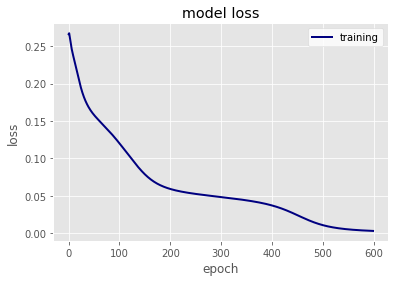

In [98]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.train_loss_history, color='navy', lw=2)
loss.set_title('model loss')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

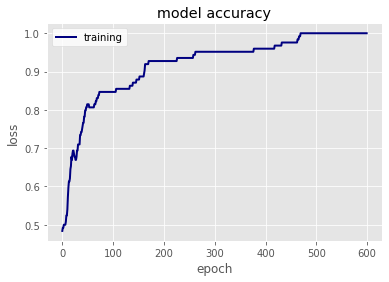

In [99]:
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.val_accuracy_history, color='navy', lw=2)
loss.set_title('model accuracy')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()